In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data=pd.read_csv(r"C:\Users\Sujan H G\Downloads\Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.shape

(545, 13)

In [5]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data=data.drop(columns="prefarea")

In [8]:
data.shape

(545, 12)

In [9]:
scaler=StandardScaler()
data["price"]=scaler.fit_transform(data[["price"]])
data["area"]=scaler.fit_transform(data[["area"]])
data["bedrooms"]=scaler.fit_transform(data[["bedrooms"]])
data["bathrooms"]=scaler.fit_transform(data[["bathrooms"]])
data["stories"]=scaler.fit_transform(data[["stories"]])
data["parking"]=scaler.fit_transform(data[["parking"]])


In [10]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,yes,no,no,no,yes,1.517692,furnished
1,4.004484,1.757010,1.403419,5.405809,2.532024,yes,no,no,no,yes,2.679409,furnished
2,4.004484,2.218232,0.047278,1.421812,0.224410,yes,no,yes,no,no,1.517692,semi-furnished
3,3.985755,1.083624,1.403419,1.421812,0.224410,yes,no,yes,no,yes,2.679409,furnished
4,3.554979,1.046726,1.403419,-0.570187,0.224410,yes,yes,yes,no,yes,1.517692,furnished


In [11]:
encoder=LabelEncoder()
data["mainroad"]=encoder.fit_transform(data.mainroad)
data["guestroom"]=encoder.fit_transform(data.guestroom)
data["basement"]=encoder.fit_transform(data.basement)
data["hotwaterheating"]=encoder.fit_transform(data.hotwaterheating)
data["airconditioning"]=encoder.fit_transform(data.airconditioning)
data["furnishingstatus"]=encoder.fit_transform(data.furnishingstatus)

In [12]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0


In [13]:
data.furnishingstatus.value_counts()

furnishingstatus
1    227
2    178
0    140
Name: count, dtype: int64

In [14]:
x=data.drop(columns=["price"])
y=data["price"]

In [23]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x,y)
mutual_info

array([0.28527275, 0.09341632, 0.16156598, 0.14019903, 0.07360119,
       0.0557611 , 0.04805756, 0.01766501, 0.09920622, 0.13555046,
       0.1241358 ])

In [24]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
mutual_info.sort_values(ascending=False)

area                0.285273
bathrooms           0.161566
stories             0.140199
parking             0.135550
furnishingstatus    0.124136
airconditioning     0.099206
bedrooms            0.093416
mainroad            0.073601
guestroom           0.055761
basement            0.048058
hotwaterheating     0.017665
dtype: float64

<Axes: >

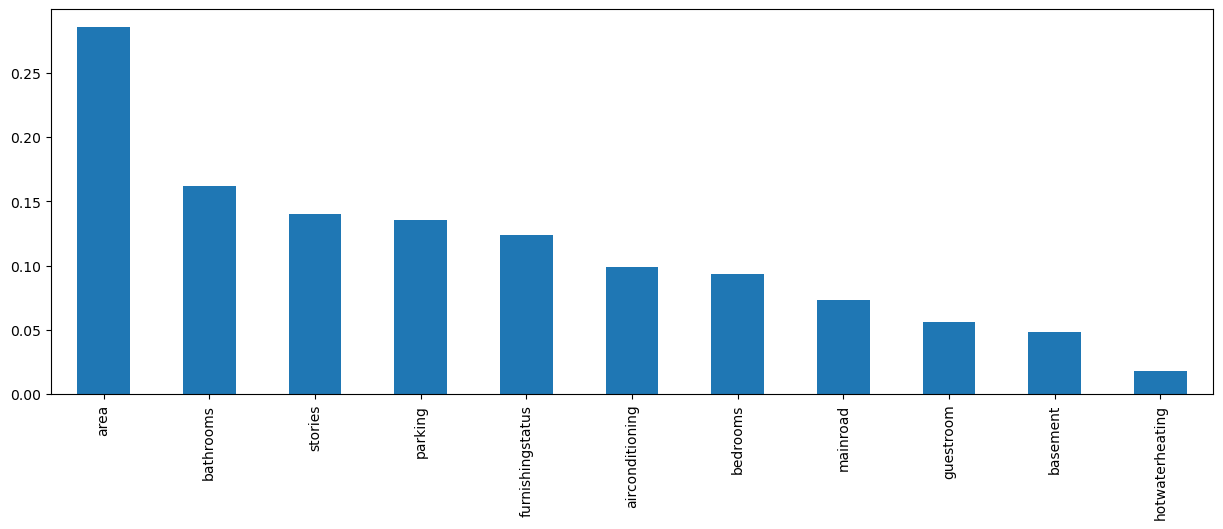

In [26]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [27]:
from sklearn.feature_selection import SelectKBest

In [28]:
select_top_columns=SelectKBest(mutual_info_regression,k=5)
select_top_columns.fit(x,y)

SelectKBest(k=5,
            score_func=<function mutual_info_regression at 0x0000025E476444A0>)

In [30]:
x.columns[select_top_columns.get_support()]

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking'], dtype='object')

In [33]:
x_data=data[x.columns[select_top_columns.get_support()]]
x_data.head()

,area,bathrooms,stories,airconditioning,parking
0,1.046726,1.421812,1.378217,1,1.517692
1,1.757010,5.405809,2.532024,1,2.679409
2,2.218232,1.421812,0.224410,0,1.517692
3,1.083624,1.421812,0.224410,1,2.679409
4,1.046726,-0.570187,0.224410,1,1.517692


In [34]:
x_data.shape,y.shape

((545, 5), (545,))

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y,random_state=42,shuffle=True,test_size=0.2)

In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((436, 5), (109, 5), (436,), (109,))

In [52]:
#Initalize the models

models={"Linear Regression":LinearRegression(),
        "Decision Tree":DecisionTreeRegressor(random_state=42),
        "Random Forest":RandomForestRegressor(n_estimators=100,random_state=42),
        "Gradient Boosting":GradientBoostingRegressor(n_estimators=100,random_state=42),
        "AdaBoost":AdaBoostRegressor(n_estimators=100,random_state=42),
        "Suuport Vector Reggression":SVR(),
        "K-Neighbours":KNeighborsRegressor()
       }

In [53]:
results={}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    results[name]=y_pred


In [54]:
performance={}
for name,y_pred in results.items():
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    performance[name]=rmse

for name,rmse in performance.items():
    print(f"{name}:RMSE={rmse}")

Linear Regression:RMSE=0.7762224477172358
Decision Tree:RMSE=0.9488634207832911
Random Forest:RMSE=0.8098445546703233
Gradient Boosting:RMSE=0.7698330904315431
AdaBoost:RMSE=0.86803472863953
Suuport Vector Reggression:RMSE=0.8098289296610797
K-Neighbours:RMSE=0.8721238773381912


In [80]:
best_model=DecisionTreeRegressor(random_state=42)
best_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [81]:
pred=best_model.predict(x_test)

In [85]:
print("Accuracy of Model:",mean_squared_error(y_test,pred)*100)

Accuracy of Model: 90.03417913005688
